In [2]:
import numpy as np
#import mlflow
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
from PIL import Image
from dataset import *
from save_load import *
from NN_library.AutoUnet_benchmark.AutoUnet_benchmark import *
from NN_library.AutoUnet_benchmark.train_AutoUnet_benchmark import *
%load_ext autoreload
%autoreload 2

#mlflow.autolog()

Using device: cuda


In [3]:
data = dataset_seq()
geometry, damage, imp_shrinkage, obs_shrinkage, stiffness = data.__getitem__(1000)
loaders = get_loaders(data, 16)

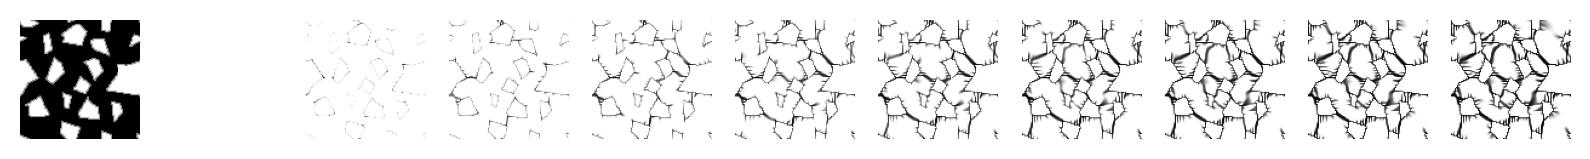

In [3]:
fig, axs = plt.subplots(nrows=1, ncols=11, figsize=(10, 1), dpi=200)
axs.flat[0].imshow(geometry[0], cmap='Greys')
axs.flat[0].set_axis_off()
for i in range(1,11):
    axs.flat[i].imshow(damage[i], cmap='Greys')
    axs.flat[i].set_axis_off()

In [4]:
name = 'NN_library/AutoUnet_benchmark/AutoUnet_benchmark_x2'
args = {'lr' : 0.000005, 'epochs' : 20, 'dev' : dev, 'name' : name}

In [5]:
unet = AutoUNet(128)

In [9]:
torch.cuda.empty_cache() 

In [8]:
total_params = sum(p.numel() for p in unet.parameters())
print(f"Number of parameters: {total_params}")

Number of parameters: 7697475


In [5]:
total_params = sum(p.numel() for p in unet.parameters())
print(f"Number of parameters: {total_params}")

Number of parameters: 30779523


In [8]:
unet = load_network(unet, args['name']+'_19', args)

In [10]:
losses_train, losses_val = train(unet, loaders, args)

Epoch: 0 batch: 0 mean train loss:  23144.8856854439
Epoch: 0 batch: 100 mean train loss:  22865.3486840725
Epoch: 0 batch: 200 mean train loss:  23102.8765838146
Epoch: 0 batch: 300 mean train loss:  22541.7928903103
Epoch: 0 batch: 400 mean train loss:  23194.2736876011
Epoch: 0 batch: 500 mean train loss:  22687.5062170029
Epoch: 0 batch: 600 mean train loss:  22739.3783439398
Epoch: 0 batch: 700 mean train loss:  22939.6871018410
Epoch: 0 mean train loss:  23150.6523763948 mean val. rec. loss:  23195.0312500000
Epoch: 1 batch: 0 mean train loss:  23308.7597930431
Epoch: 1 batch: 100 mean train loss:  22845.3727819920
Epoch: 1 batch: 200 mean train loss:  21052.2203583717
Epoch: 1 batch: 300 mean train loss:  23413.0519788265
Epoch: 1 batch: 400 mean train loss:  24046.6237065792
Epoch: 1 batch: 500 mean train loss:  23437.8968222141
Epoch: 1 batch: 600 mean train loss:  23255.1399157047
Epoch: 1 batch: 700 mean train loss:  23169.9971667528
Epoch: 1 mean train loss:  23140.15262973

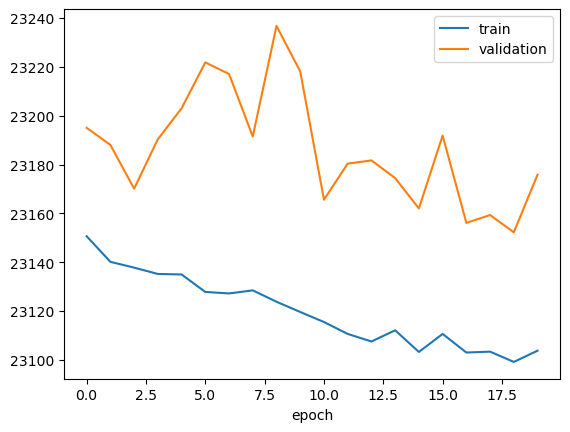

In [12]:
plt.plot(losses_train)
plt.plot(losses_val)
plt.xlabel('epoch')
plt.legend(['train', 'validation'])